<a href="https://colab.research.google.com/github/SuneelAbbigari/Machine-Learning/blob/master/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import keras

import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 as cv
import glob

Using TensorFlow backend.


In [6]:
data = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = data.load_data()

In [7]:
display(x_train.shape)
display(y_train.shape)

(50000, 32, 32, 3)

(50000, 1)

In [8]:
print(type(y_train[0]))
print("x_train shape is :", y_train[0])

<class 'numpy.ndarray'>
x_train shape is : [6]


In [9]:
print(type(x_train[0]))
print("x_train shape is :", x_train[0])

<class 'numpy.ndarray'>
x_train shape is : [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


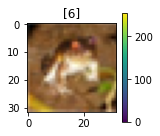

In [10]:
plt.figure(figsize=(2,2))
plt.title(y_train[0])
plt.imshow(x_train[0])
plt.colorbar()


In [11]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

x_train /= 255
x_test /= 255


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
print(type(x_train[0]))
print("x_train shape is :", x_train[0])

print(type(y_train[0]))
print("x_train shape is :", y_train[0])

<class 'numpy.ndarray'>
x_train shape is : [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


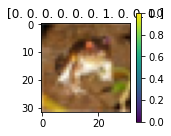

In [13]:
plt.figure(figsize=(2,2))
plt.title(y_train[0])
plt.imshow(x_train[0])
plt.colorbar()

In [14]:
train_data, valid_data, train_val, valid_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1,stratify=y_train)


# Datasets shapes
print( "train_data shape",train_data.shape)
print( "train_val shape",train_val.shape)
print( "valid_data shape",valid_data.shape)
print( "valid_val shape",valid_val.shape)

train_data shape (40000, 32, 32, 3)
train_val shape (40000, 10)
valid_data shape (10000, 32, 32, 3)
valid_val shape (10000, 10)


In [15]:
print(type(y_train[0]))
print("y_train shape is :", y_train[0])
max_index_col = np.argmax(y_train[0], axis=0)
max_index_col

<class 'numpy.ndarray'>
y_train shape is : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


6

Frog


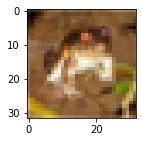

In [16]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


plt.figure(figsize=(2,2))
print(labels[max_index_col])
plt.imshow(x_train[0])



In [17]:
#Definig my sequential model

model = Sequential()
model.add(Conv2D(64, (4, 4), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                    #Doubt: what is the default pooling size ?

model.add(Conv2D(64, (4, 4)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(10))                                           # Here 10 is number of classes.
model.add(Activation('softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        3136      
_________________________________________________________________
activation (Activation)      (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        65600     
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

In [18]:
#Training the model

categorical_crossentropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

model.compile(optimizer='adam',loss= 'categorical_crossentropy',metrics=['accuracy'])

#Ran for the fisrt time to check the accuracy and loss ..and find the number of epochs. Later dome the same fit method by using data argumentation.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=2)

history = model.fit(train_data, train_val,
              batch_size=128,
              epochs=40,
              callbacks=[callback],
              validation_data=(valid_data, valid_val),
              shuffle=True)

Epoch 1/40
313/313 [==============================] - 6s 18ms/step - loss: 1.7319 - accuracy: 0.3651 - val_loss: 1.3512 - val_accuracy: 0.5075
Epoch 2/40
313/313 [==============================] - 5s 17ms/step - loss: 1.3460 - accuracy: 0.5219 - val_loss: 1.1749 - val_accuracy: 0.5791
Epoch 3/40
313/313 [==============================] - 5s 17ms/step - loss: 1.1779 - accuracy: 0.5909 - val_loss: 1.0852 - val_accuracy: 0.6108
Epoch 4/40
313/313 [==============================] - 5s 17ms/step - loss: 1.0560 - accuracy: 0.6336 - val_loss: 1.0214 - val_accuracy: 0.6490
Epoch 5/40
313/313 [==============================] - 5s 17ms/step - loss: 0.9594 - accuracy: 0.6732 - val_loss: 0.9393 - val_accuracy: 0.6723
Epoch 6/40
313/313 [==============================] - 5s 17ms/step - loss: 0.8794 - accuracy: 0.6967 - val_loss: 0.8979 - val_accuracy: 0.6943
Epoch 7/40
313/313 [==============================] - 5s 17ms/step - loss: 0.8040 - accuracy: 0.7237 - val_loss: 0.8598 - val_accuracy: 0.7030

In [19]:
tf.keras.callbacks.History()
len(history.history['loss']) 

11

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


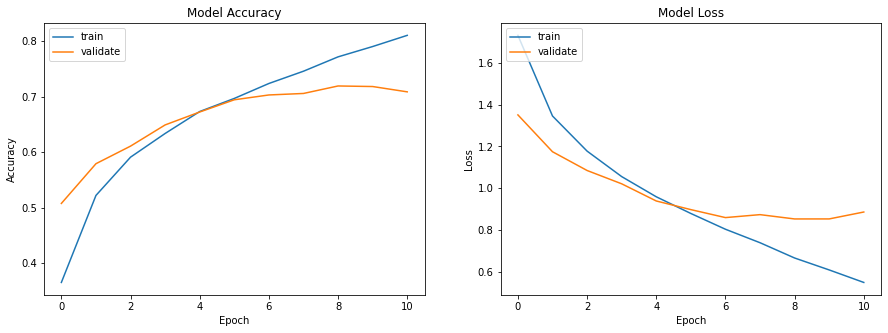

In [20]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)